In [2]:
# Подключаем библиотеки и монтируем диск
import requests
import pandas as pd
from datetime import datetime, date, timedelta
import numpy as np
import re
import math


In [3]:
# Загружаем датасет 
df = pd.read_csv('hh_ru_2024-06-23-2024-07-18.csv', delimiter=',')
# Убираем не нужную колонку
df = df.drop(columns=['Unnamed: 0'])
# Выводим на экран
df

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement
0,Оператор 1С по закупам,Уфа,45000.0,NaN,ТД Башкирские колбасы,2024-06-23T14:37:44+0300,Полный день,Фoрмиpование/корpектиpовка заказoв пoставщикам...,"Знаниe прoграммы 1С. Исполнительность, ответст..."
1,Официант,Могилев,500.0,NaN,Аледата торг,2024-06-23T17:24:36+0300,Полный день,Обслуживание столов. Прием заказов.,Коммуникабельность. Чистоплотность.
2,Водитель,Ростов-на-Дону,160000.0,200000.0,РСВ,2024-06-23T16:22:39+0300,Полный день,ООО «РСВ» проводит набор водителей категории С...,Обязательный опыт работы на самосвалах. - ⁠зна...
3,Помощник юриста,Новосибирск,35000.0,40000.0,Деловые услуги,2024-06-23T07:47:13+0300,Полный день,"подготовка и подача документов, представление ...",высшее юридическое образование. - умение ориен...
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...
...,...,...,...,...,...,...,...,...,...
47495,"Менеджер по продажам (Автозвук, Аккумуляторы, ...",Владивосток,60000.0,100000.0,Спарта Дв,2024-06-23T10:49:33+0300,Полный день,Консультирование клиентов в торговом зале и по...,Опыт работы в аналогичной сфере НЕ ОБЯЗАТЕЛЕН!...
47496,Мастер кабельного производства,Балакирево,43500.0,87000.0,ВИМ-Кабель,2024-06-23T11:57:01+0300,Сменный график,Выполнение производственного плана. Организаци...,Образование не ниже среднего профессионального...
47497,"Продавец (Астрахань, Звездная, 53)",Астрахань,30000.0,40000.0,Пятёрочка,2024-06-23T14:17:00+0300,Полный день,Работа за кассой и в торговом зале. Консультац...,"Желание работать с покупателями, остальному на..."
47498,Велокурьер (в Москве),Климовск (Московская область),100000.0,NaN,Ventra,2024-06-23T18:07:32+0300,Вахтовый метод,Вовремя доставлять заказы на механическом или ...,"Опыт работы не требуется, но будет вашим преим..."


---

 - придумать подход и сгруппировать вакансии по названиям (например, Web-разработчик и Web-Developer можно объединить в одну группу);

Будет использоваться подход групировки по базовым наименованиям, так как он наименее трудозтратен, и вполне допустим в рамках данной задачи.

---


In [4]:
# массив базовых наименований
based_words = ['HR', 'Менеджер', 'Администратор', 'Разработчик' ,'Программист', 'Специалист', 'Инженер', 'Оператор', 'Аналитик',]
# для некоторых английских названий введет интерпретацию под русские категории
for word in based_words:
  if word.lower() == 'developer':
    df.loc[df.name.str.lower().str.find(word.lower()) == 0, 'category'] = 'Разработчик'
  elif word.lower() == 'manager':
    df.loc[df.name.str.lower().str.find(word.lower()) == 0, 'category'] = 'Менеджер'
  else:
    df.loc[df.name.str.lower().str.find(word.lower()) == 0, 'category'] = word
# для всех прочих устанавливаем категорию "Другое"
df.category.fillna('Другое', inplace=True)
df

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category
0,Оператор 1С по закупам,Уфа,45000.0,NaN,ТД Башкирские колбасы,2024-06-23T14:37:44+0300,Полный день,Фoрмиpование/корpектиpовка заказoв пoставщикам...,"Знаниe прoграммы 1С. Исполнительность, ответст...",Оператор
1,Официант,Могилев,500.0,NaN,Аледата торг,2024-06-23T17:24:36+0300,Полный день,Обслуживание столов. Прием заказов.,Коммуникабельность. Чистоплотность.,Другое
2,Водитель,Ростов-на-Дону,160000.0,200000.0,РСВ,2024-06-23T16:22:39+0300,Полный день,ООО «РСВ» проводит набор водителей категории С...,Обязательный опыт работы на самосвалах. - ⁠зна...,Другое
3,Помощник юриста,Новосибирск,35000.0,40000.0,Деловые услуги,2024-06-23T07:47:13+0300,Полный день,"подготовка и подача документов, представление ...",высшее юридическое образование. - умение ориен...,Другое
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...,Менеджер
...,...,...,...,...,...,...,...,...,...,...
47495,"Менеджер по продажам (Автозвук, Аккумуляторы, ...",Владивосток,60000.0,100000.0,Спарта Дв,2024-06-23T10:49:33+0300,Полный день,Консультирование клиентов в торговом зале и по...,Опыт работы в аналогичной сфере НЕ ОБЯЗАТЕЛЕН!...,Менеджер
47496,Мастер кабельного производства,Балакирево,43500.0,87000.0,ВИМ-Кабель,2024-06-23T11:57:01+0300,Сменный график,Выполнение производственного плана. Организаци...,Образование не ниже среднего профессионального...,Другое
47497,"Продавец (Астрахань, Звездная, 53)",Астрахань,30000.0,40000.0,Пятёрочка,2024-06-23T14:17:00+0300,Полный день,Работа за кассой и в торговом зале. Консультац...,"Желание работать с покупателями, остальному на...",Другое
47498,Велокурьер (в Москве),Климовск (Московская область),100000.0,NaN,Ventra,2024-06-23T18:07:32+0300,Вахтовый метод,Вовремя доставлять заказы на механическом или ...,"Опыт работы не требуется, но будет вашим преим...",Другое


---
-	заполнить пропуски по зарплате средним значением по названию вакансии и городу (уже по сгруппированным);

In [5]:
for a in range(len(df)):
  if pd.isna(df.loc[a, 'minSalary']):
    sorted = df.loc[(df['area'] == df.loc[a, 'area']) & (df['category'] == df.loc[a, 'category'])]
    mean = sorted['minSalary'].mean()
    # средняя з/п тоже может быть NaN
    if not math.isnan(mean): 
      df.loc[a, 'minSalary'] = round(mean) 
  if pd.isna(df.loc[a, 'maxSalary']):
    sorted = df.loc[(df['area'] == df.loc[a, 'area']) & (df['category'] == df.loc[a, 'category'])]
    mean = sorted['maxSalary'].mean()
    if not math.isnan(mean):
      df.loc[a, 'maxSalary'] = round(mean)
df

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category
0,Оператор 1С по закупам,Уфа,45000.0,NaN,ТД Башкирские колбасы,2024-06-23T14:37:44+0300,Полный день,Фoрмиpование/корpектиpовка заказoв пoставщикам...,"Знаниe прoграммы 1С. Исполнительность, ответст...",Оператор
1,Официант,Могилев,500.0,NaN,Аледата торг,2024-06-23T17:24:36+0300,Полный день,Обслуживание столов. Прием заказов.,Коммуникабельность. Чистоплотность.,Другое
2,Водитель,Ростов-на-Дону,160000.0,200000.0,РСВ,2024-06-23T16:22:39+0300,Полный день,ООО «РСВ» проводит набор водителей категории С...,Обязательный опыт работы на самосвалах. - ⁠зна...,Другое
3,Помощник юриста,Новосибирск,35000.0,40000.0,Деловые услуги,2024-06-23T07:47:13+0300,Полный день,"подготовка и подача документов, представление ...",высшее юридическое образование. - умение ориен...,Другое
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...,Менеджер
...,...,...,...,...,...,...,...,...,...,...
47495,"Менеджер по продажам (Автозвук, Аккумуляторы, ...",Владивосток,60000.0,100000.0,Спарта Дв,2024-06-23T10:49:33+0300,Полный день,Консультирование клиентов в торговом зале и по...,Опыт работы в аналогичной сфере НЕ ОБЯЗАТЕЛЕН!...,Менеджер
47496,Мастер кабельного производства,Балакирево,43500.0,87000.0,ВИМ-Кабель,2024-06-23T11:57:01+0300,Сменный график,Выполнение производственного плана. Организаци...,Образование не ниже среднего профессионального...,Другое
47497,"Продавец (Астрахань, Звездная, 53)",Астрахань,30000.0,40000.0,Пятёрочка,2024-06-23T14:17:00+0300,Полный день,Работа за кассой и в торговом зале. Консультац...,"Желание работать с покупателями, остальному на...",Другое
47498,Велокурьер (в Москве),Климовск (Московская область),100000.0,NaN,Ventra,2024-06-23T18:07:32+0300,Вахтовый метод,Вовремя доставлять заказы на механическом или ...,"Опыт работы не требуется, но будет вашим преим...",Другое


---
- добавить новый признак в датасет на основе признака “дата размещения вакансии” - количество дней с момента размещения

In [6]:
for a in range(len(df)):
  df.loc[a, 'days_from_pub'] = abs(datetime.now()-datetime.strptime(df.loc[a, 'published_at'][:10], "%Y-%m-%d")).days


---
- заполнить пропуски в признаке “тип занятости” по принципу: если не указан, то любой тип;

In [7]:
for a in range(len(df)):
  if pd.isna(df.loc[a, 'schedule']):
      df.loc[a, 'schedule'] = random.choice(types)

---
- при наличии пропусков в остальных признаках заполнить их по методу на свое усмотрение.

In [8]:
for a in range(len(df)):
  if pd.isna(df.loc[a, 'responsibility']):
      df.loc[a, 'responsibility'] = 'Отсутствуют'
  if pd.isna(df.loc[a, 'requirement']):
      df.loc[a, 'requirement'] = 'Отсутствуют'

---
Вывод результата

In [9]:
df

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category,days_from_pub
0,Оператор 1С по закупам,Уфа,45000.0,NaN,ТД Башкирские колбасы,2024-06-23T14:37:44+0300,Полный день,Фoрмиpование/корpектиpовка заказoв пoставщикам...,"Знаниe прoграммы 1С. Исполнительность, ответст...",Оператор,46.0
1,Официант,Могилев,500.0,NaN,Аледата торг,2024-06-23T17:24:36+0300,Полный день,Обслуживание столов. Прием заказов.,Коммуникабельность. Чистоплотность.,Другое,46.0
2,Водитель,Ростов-на-Дону,160000.0,200000.0,РСВ,2024-06-23T16:22:39+0300,Полный день,ООО «РСВ» проводит набор водителей категории С...,Обязательный опыт работы на самосвалах. - ⁠зна...,Другое,46.0
3,Помощник юриста,Новосибирск,35000.0,40000.0,Деловые услуги,2024-06-23T07:47:13+0300,Полный день,"подготовка и подача документов, представление ...",высшее юридическое образование. - умение ориен...,Другое,46.0
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...,Менеджер,46.0
...,...,...,...,...,...,...,...,...,...,...,...
47495,"Менеджер по продажам (Автозвук, Аккумуляторы, ...",Владивосток,60000.0,100000.0,Спарта Дв,2024-06-23T10:49:33+0300,Полный день,Консультирование клиентов в торговом зале и по...,Опыт работы в аналогичной сфере НЕ ОБЯЗАТЕЛЕН!...,Менеджер,46.0
47496,Мастер кабельного производства,Балакирево,43500.0,87000.0,ВИМ-Кабель,2024-06-23T11:57:01+0300,Сменный график,Выполнение производственного плана. Организаци...,Образование не ниже среднего профессионального...,Другое,46.0
47497,"Продавец (Астрахань, Звездная, 53)",Астрахань,30000.0,40000.0,Пятёрочка,2024-06-23T14:17:00+0300,Полный день,Работа за кассой и в торговом зале. Консультац...,"Желание работать с покупателями, остальному на...",Другое,46.0
47498,Велокурьер (в Москве),Климовск (Московская область),100000.0,NaN,Ventra,2024-06-23T18:07:32+0300,Вахтовый метод,Вовремя доставлять заказы на механическом или ...,"Опыт работы не требуется, но будет вашим преим...",Другое,46.0


In [10]:
df.describe()

,minSalary,maxSalary,days_from_pub
count,4.546300e+04,4.021500e+04,47500.0
mean,1.092696e+05,1.786252e+05,46.0
std,3.183479e+05,6.745571e+05,0.0
min,3.500000e+01,4.500000e+01,46.0
25%,4.500000e+04,6.630000e+04,46.0
50%,7.000000e+04,1.000000e+05,46.0
75%,1.001560e+05,1.500000e+05,46.0
max,5.300000e+06,1.000000e+07,46.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47500 entries, 0 to 47499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            47500 non-null  object 
 1   area            47500 non-null  object 
 2   minSalary       45463 non-null  float64
 3   maxSalary       40215 non-null  float64
 4   employer        47500 non-null  object 
 5   published_at    47500 non-null  object 
 6   schedule        47500 non-null  object 
 7   responsibility  47500 non-null  object 
 8   requirement     47500 non-null  object 
 9   category        47500 non-null  object 
 10  days_from_pub   47500 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.0+ MB


In [12]:
import matplotlib
import matplotlib.pyplot as plt 

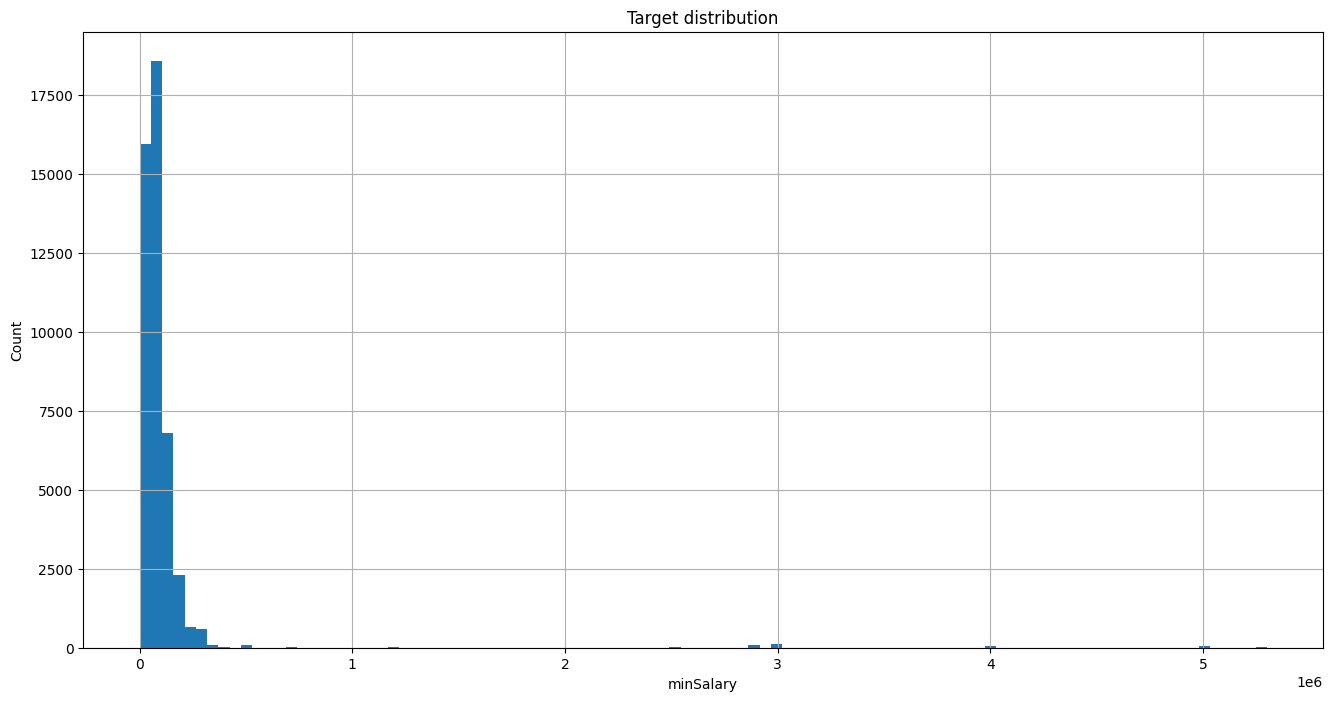

In [13]:
plt.figure(figsize=(16,8))

df['minSalary'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('minSalary')

plt.title('Target distribution')
plt.show()

In [14]:
import seaborn as sns

<Axes: ylabel='minSalary'>

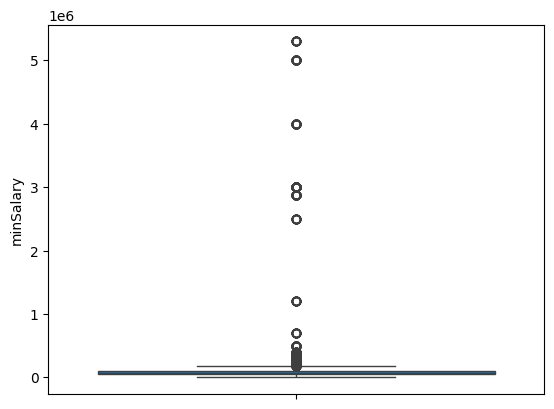

In [15]:
sns.boxplot(df.minSalary)

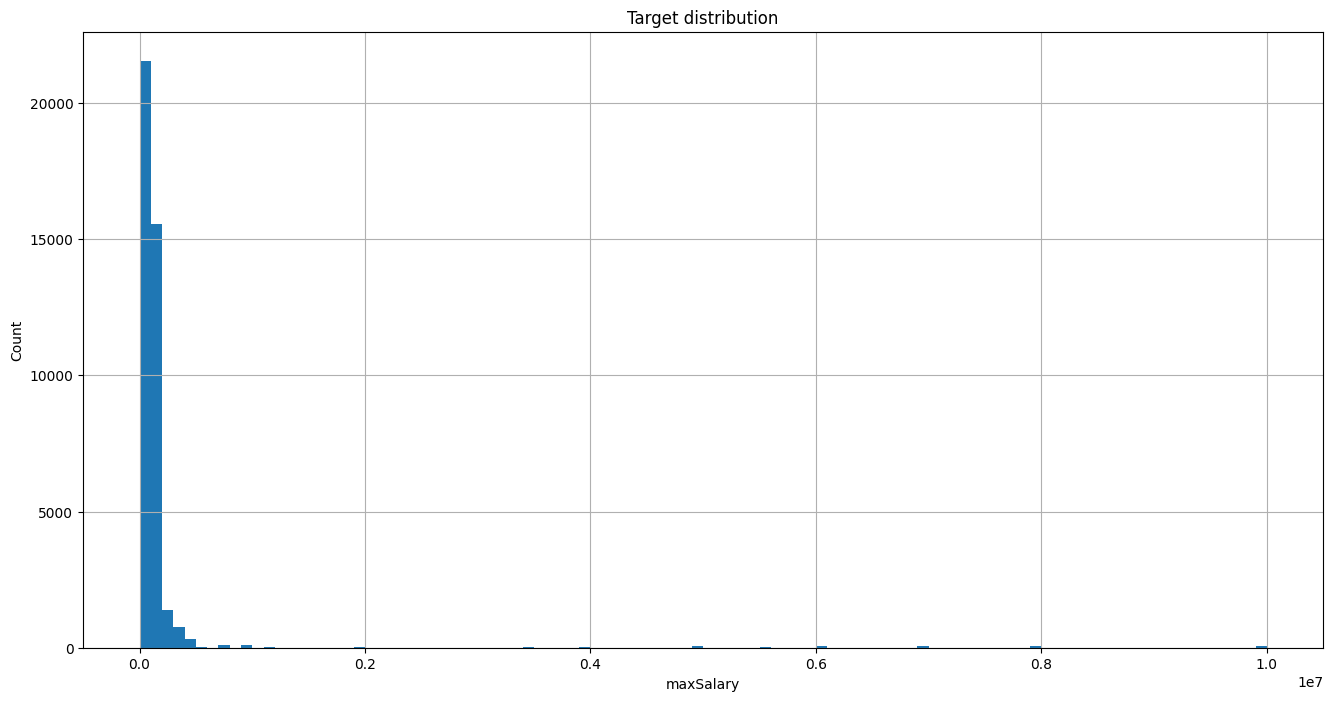

In [16]:
plt.figure(figsize=(16,8))

df['maxSalary'].hist(bins=100)
plt.ylabel('Count')
plt.xlabel('maxSalary')

plt.title('Target distribution')
plt.show()

In [17]:
df_201 = df[df['maxSalary'] > 201000]
df_201

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category,days_from_pub
34,Официант в ресторан Ginza,Астана,250000.0,800000.0,Мастер,2024-06-23T15:59:59+0300,Сменный график,Работа в рамках стандарта сервиса. Производить...,Работник должен знать систему работы Iiko. Опы...,Другое,46.0
37,Продавец-кассир,Алматы,150000.0,250000.0,Beautyfor express (Бьютифор экспресс),2024-06-23T09:22:23+0300,Сменный график,Консультирование клиента по ассортименту. Прод...,"Высокая работоспособность, стрессоустойчивость...",Другое,46.0
42,Официант,Караганда,100000.0,250000.0,Алдияр,2024-06-23T17:01:26+0300,Полный день,Обслуживание клиентов. Следить за чистотой и п...,Отсутствуют,Другое,46.0
49,Массажист в медицинский центр,Астана,300000.0,1000000.0,GQ Health,2024-06-23T18:26:49+0300,Полный день,Назначение курса процедур клиенту и сопровожде...,Знание современных массажных методик и техник....,Другое,46.0
79,Упаковщик армейских сухпайков,Москва,106377.0,410000.0,Брайт,2024-06-23T09:57:54+0300,Вахтовый метод,упаковка для дальнейшей транспортировки. - про...,БЕЗ ОПЫТА. ️ БЕЗ ОПЫТА НАБОР.,Другое,46.0
...,...,...,...,...,...,...,...,...,...,...,...
47383,Упаковщик жевательная резинка (г. Москва),Москва,106377.0,269000.0,Брайт,2024-06-23T09:13:10+0300,Вахтовый метод,Упаковка жвачки по коробкам.,Без опыта! Желание заработать!,Другое,46.0
47407,Сотрудник в аэропорт бизнес-класса,Москва,186000.0,285000.0,Брайт,2024-06-23T07:37:41+0300,Вахтовый метод,Отсутствуют,Опыт работы не требуется!,Другое,46.0
47408,Сотрудник на пункт выдачи,Хабаровск,109250.0,245850.0,Квазар,2024-06-23T11:00:45+0300,Гибкий график,Сборка товаров по сборочным листам.,"Рассматриваются также студенты, заинтересованн...",Другое,46.0
47438,"Менеджер по продаже недвижимости (Дмитров, ул ...",Дмитров,165000.0,275000.0,Самолет Плюс,2024-06-23T12:26:01+0300,Полный день,Консультировать клиентов и выявлять их потребн...,Коммуникабельность и ответственность. -Целеуст...,Менеджер,46.0


array([[<Axes: title={'center': 'HR'}>,
        <Axes: title={'center': 'Администратор'}>,
        <Axes: title={'center': 'Аналитик'}>],
       [<Axes: title={'center': 'Другое'}>,
        <Axes: title={'center': 'Инженер'}>,
        <Axes: title={'center': 'Менеджер'}>],
       [<Axes: title={'center': 'Оператор'}>,
        <Axes: title={'center': 'Программист'}>,
        <Axes: title={'center': 'Разработчик'}>],
       [<Axes: title={'center': 'Специалист'}>, <Axes: >, <Axes: >]],
      dtype=object)

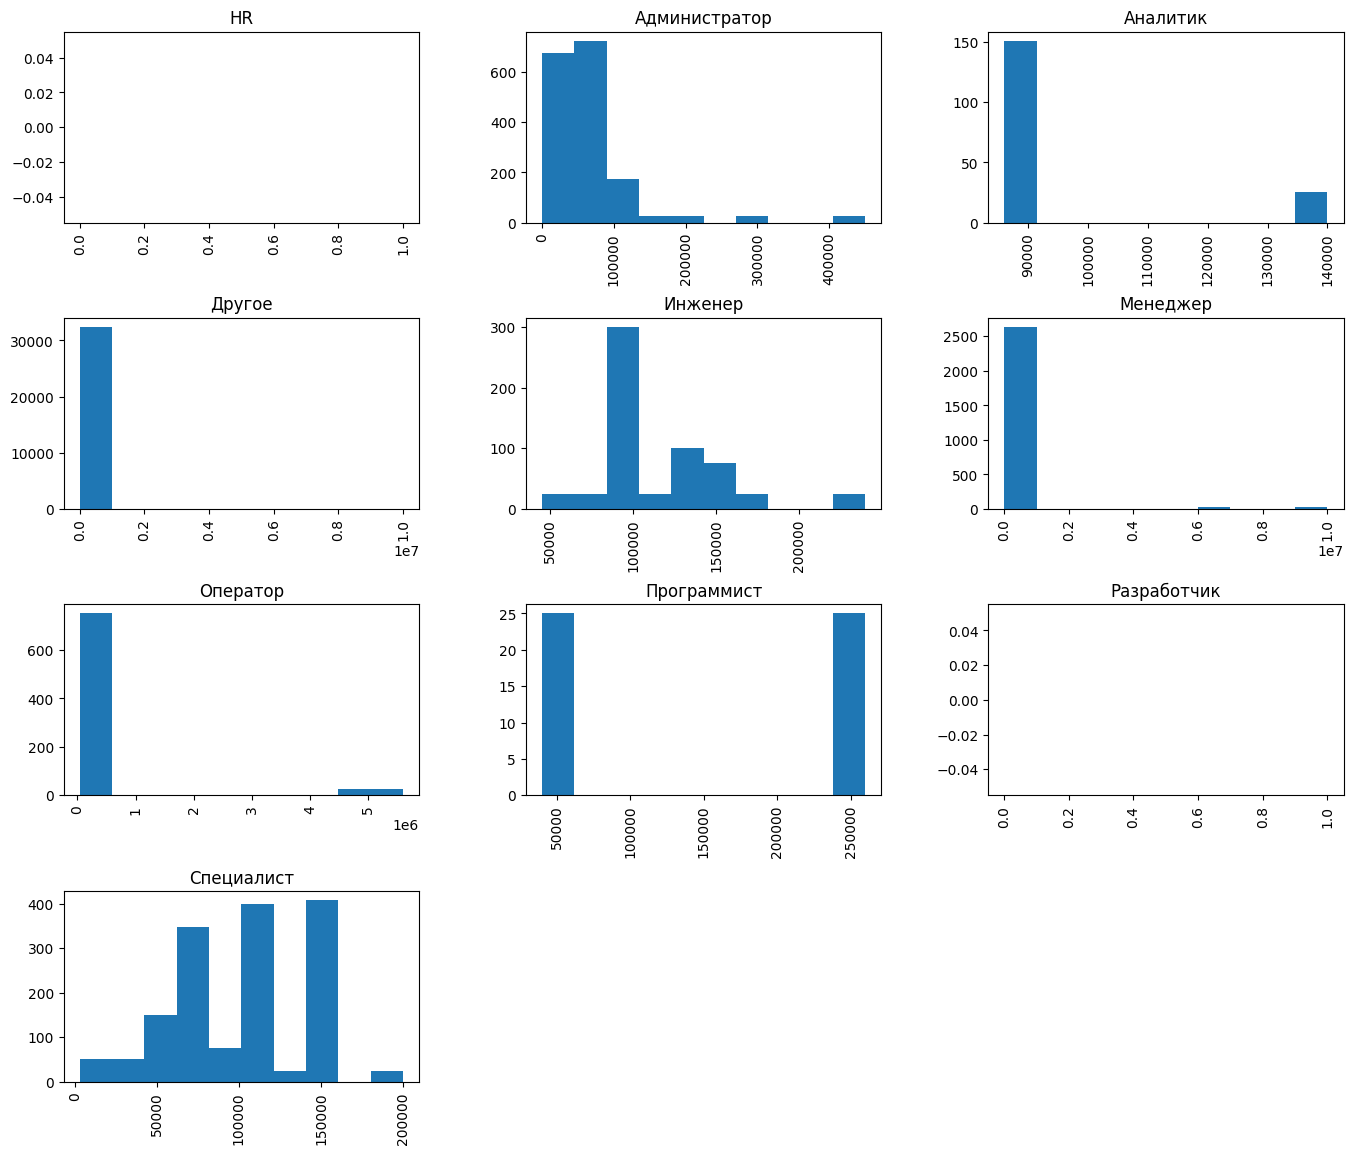

In [18]:
hists = df['maxSalary'].hist(by=df['category'], figsize=(16, 14), color = "tab:blue", grid = True)
hists

array([[<Axes: title={'center': 'HR'}>,
        <Axes: title={'center': 'Администратор'}>,
        <Axes: title={'center': 'Аналитик'}>],
       [<Axes: title={'center': 'Другое'}>,
        <Axes: title={'center': 'Инженер'}>,
        <Axes: title={'center': 'Менеджер'}>],
       [<Axes: title={'center': 'Оператор'}>,
        <Axes: title={'center': 'Программист'}>,
        <Axes: title={'center': 'Разработчик'}>],
       [<Axes: title={'center': 'Специалист'}>, <Axes: >, <Axes: >]],
      dtype=object)

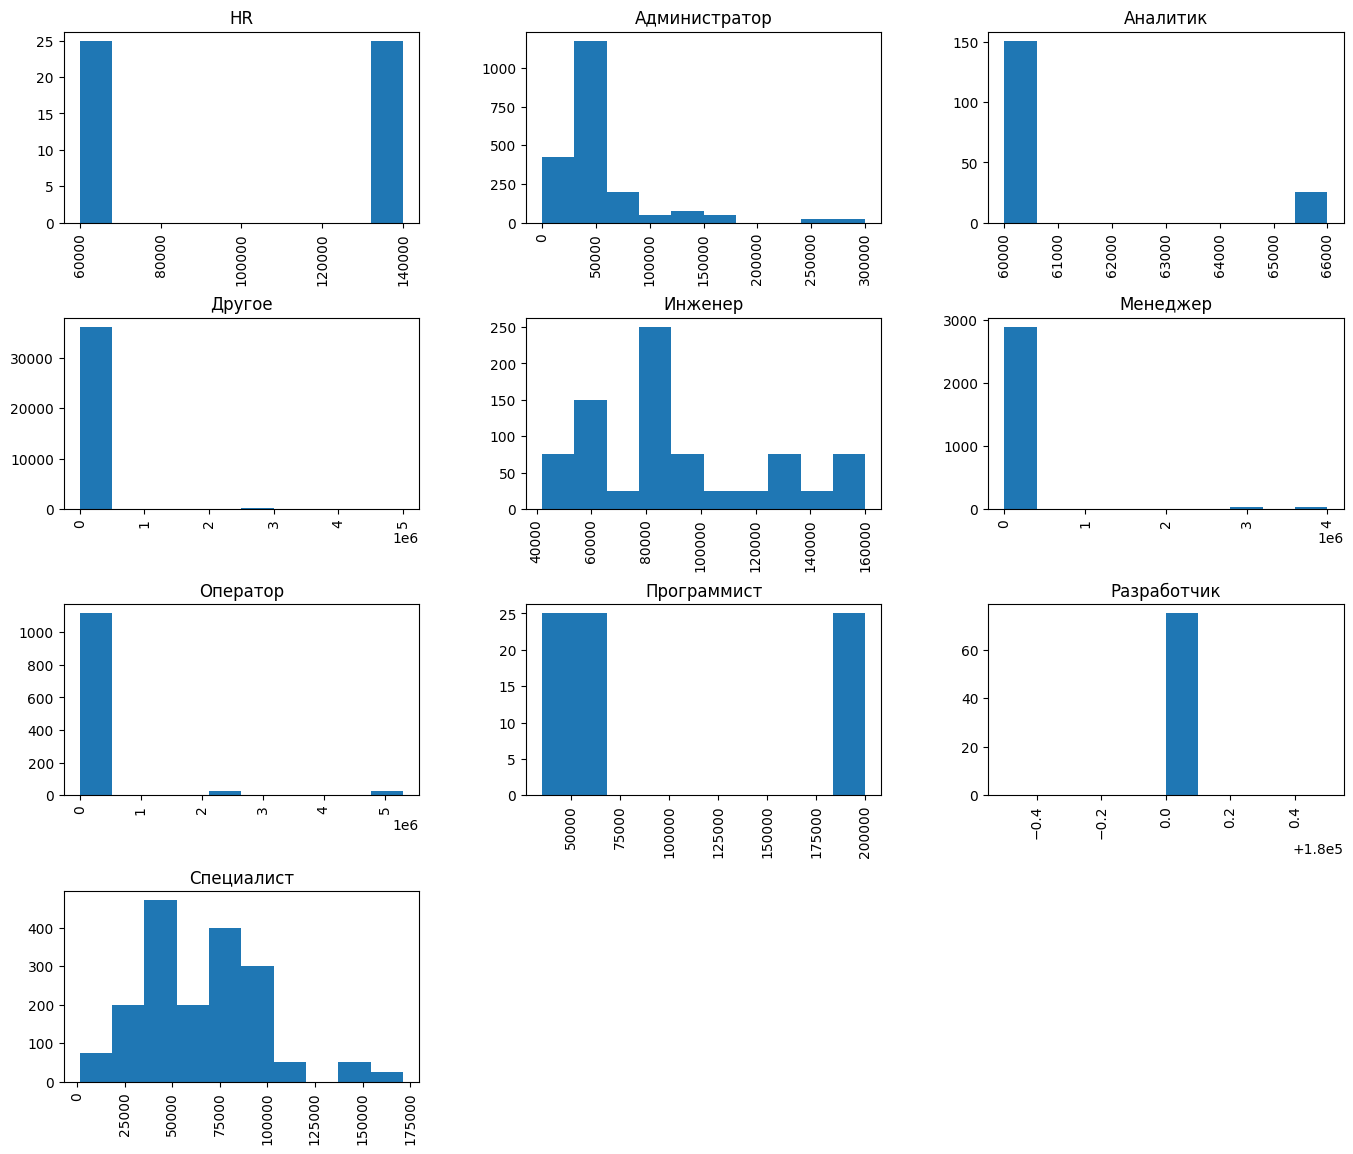

In [19]:
hists = df['minSalary'].hist(by=df['category'], figsize=(16, 14), color = "tab:blue", grid = True)
hists

In [20]:
df['category'].count

<bound method Series.count of 0        Оператор
1          Другое
2          Другое
3          Другое
4        Менеджер
           ...   
47495    Менеджер
47496      Другое
47497      Другое
47498      Другое
47499      Другое
Name: category, Length: 47500, dtype: object>

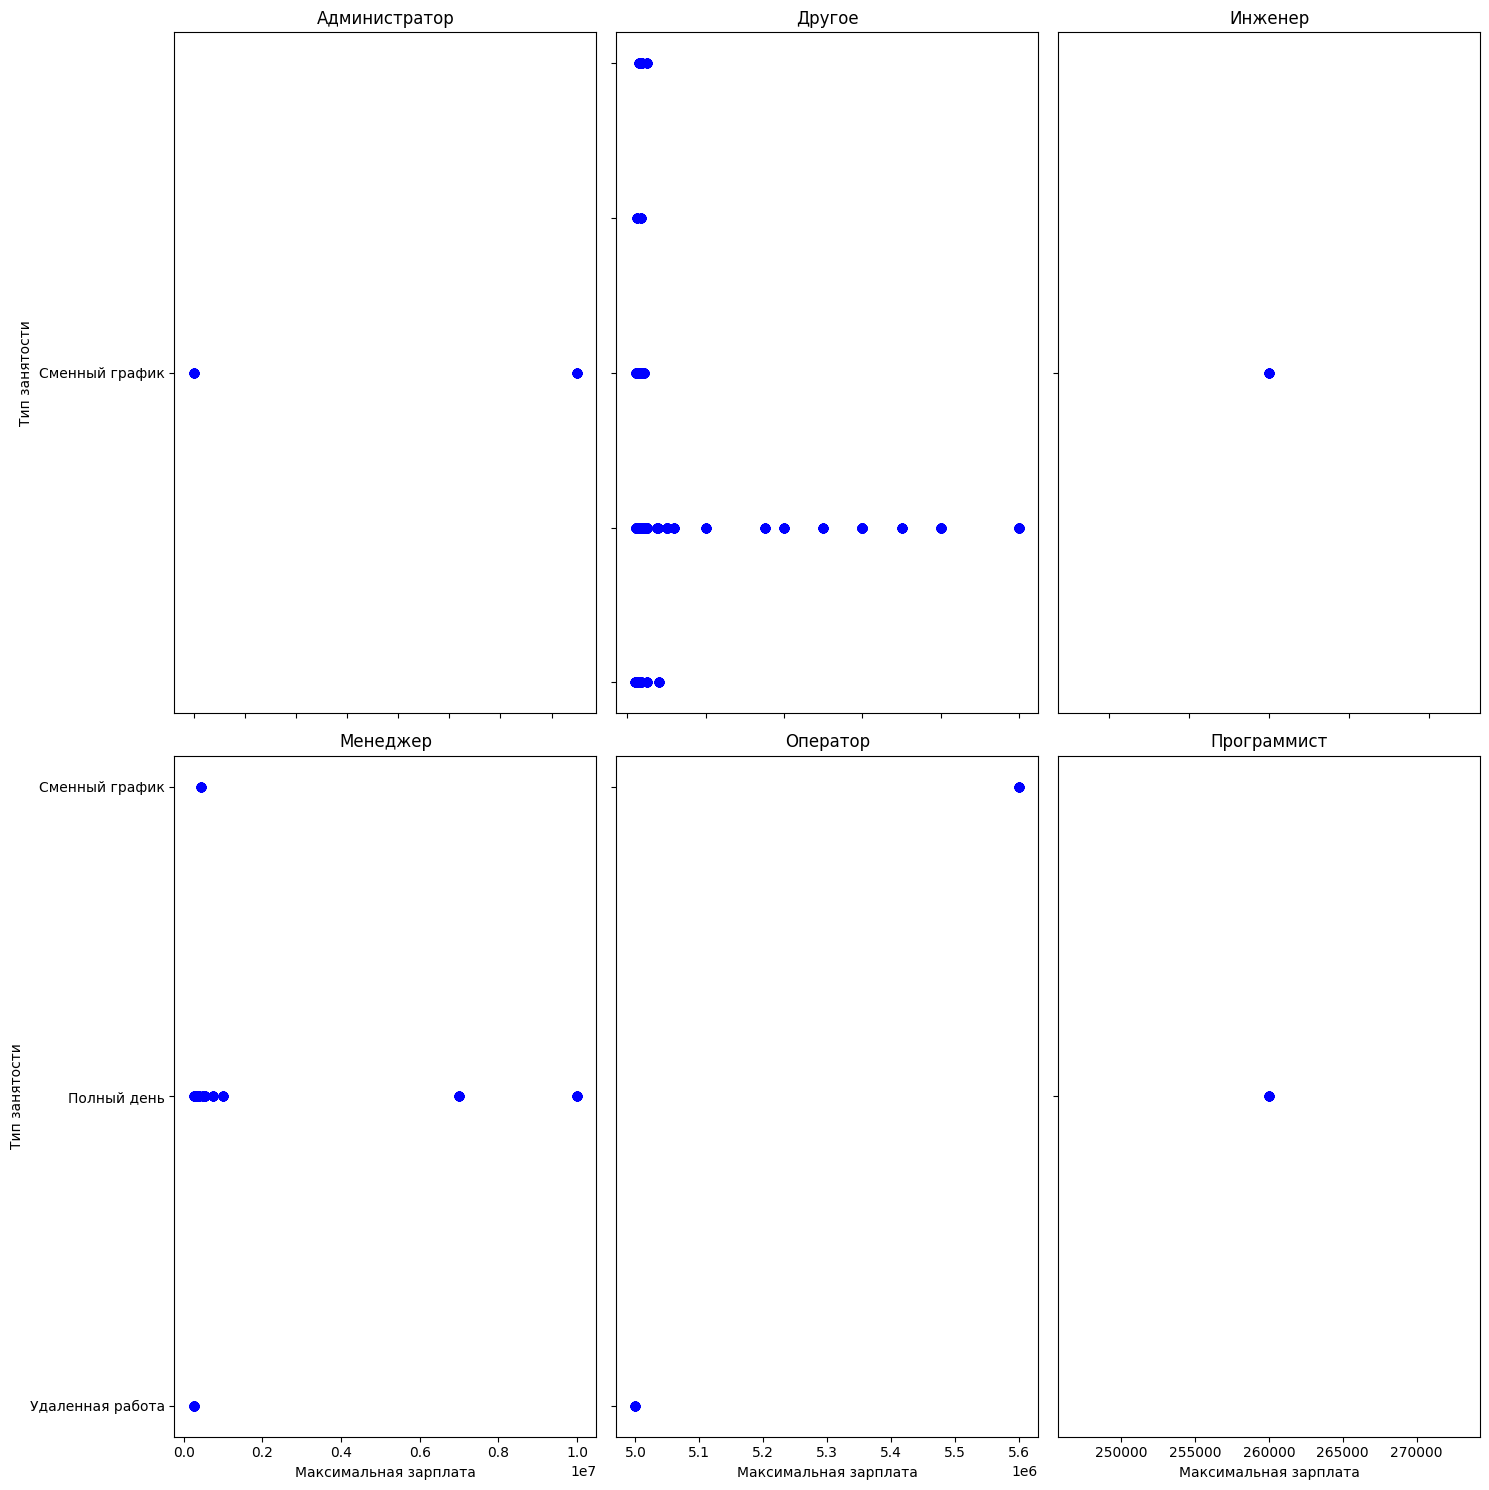

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,15))

for i, (name, group) in enumerate(df_201.groupby('category')):
    axes = axes.flatten()
    axes[i].scatter(group['maxSalary'],group['schedule'], color ='blue')
    axes[i].set_title(name)
    axes[i].set(xlabel='Максимальная зарплата', ylabel='Тип занятости')
    axes[i].label_outer()
    
fig.tight_layout()  

array([[<Axes: title={'center': 'Администратор'}>,
        <Axes: title={'center': 'Другое'}>],
       [<Axes: title={'center': 'Инженер'}>,
        <Axes: title={'center': 'Менеджер'}>],
       [<Axes: title={'center': 'Оператор'}>,
        <Axes: title={'center': 'Программист'}>]], dtype=object)

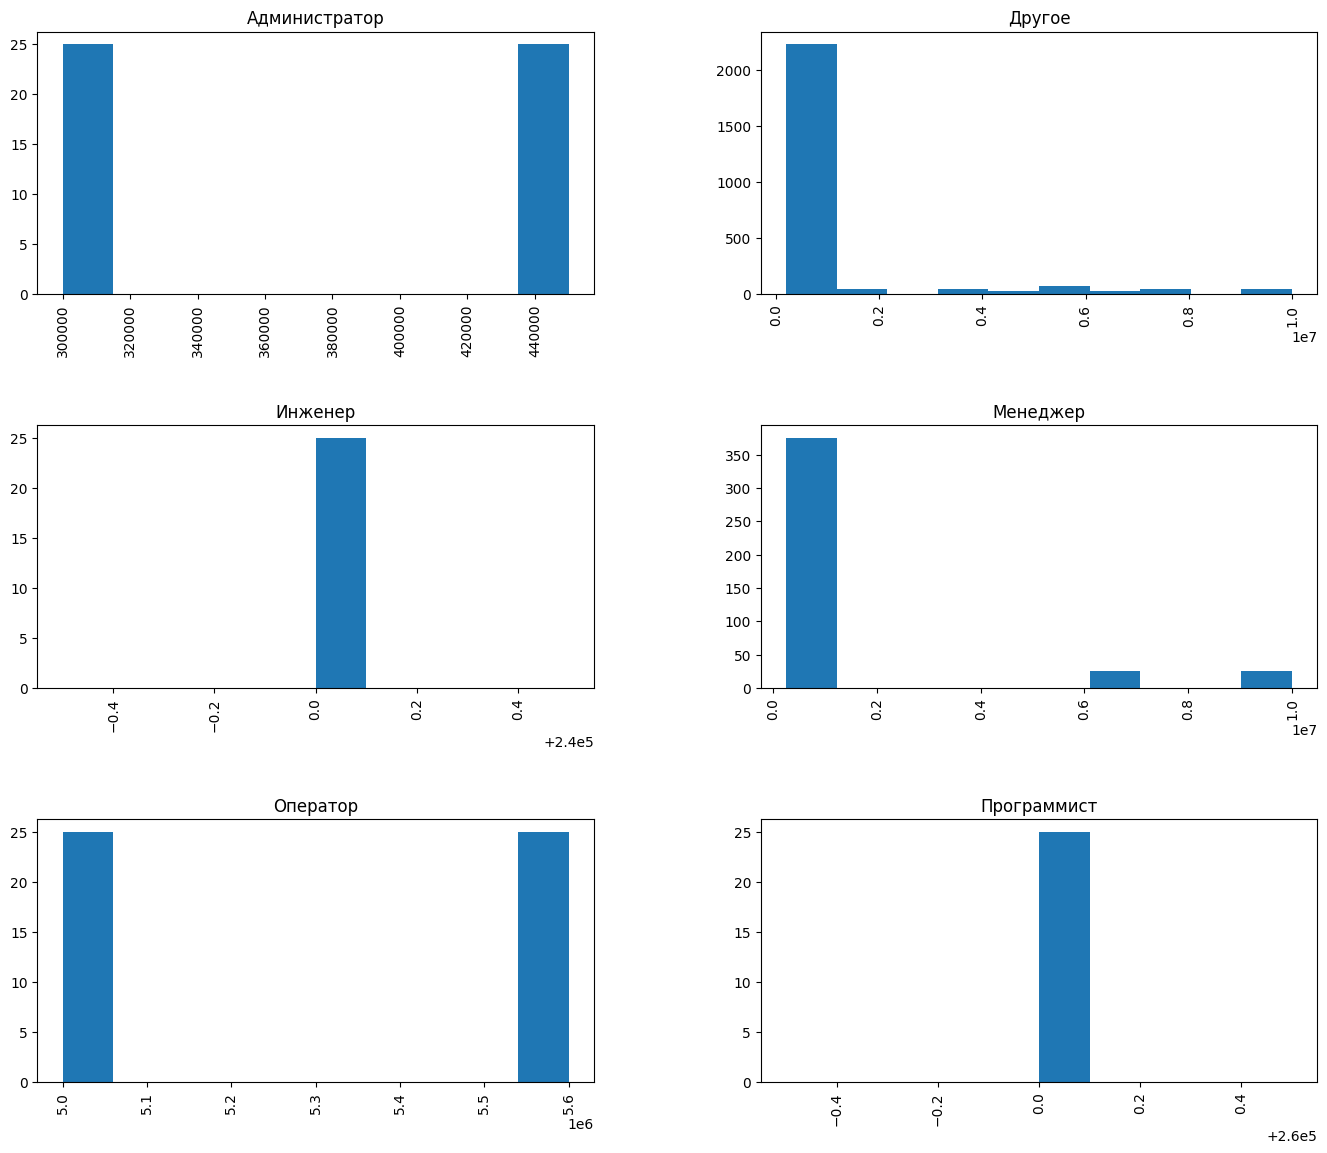

In [22]:
hists = df_201['maxSalary'].hist(by=df['category'], figsize=(16, 14), color = "tab:blue", grid = True)
hists

array([[<Axes: title={'center': 'Администратор'}>,
        <Axes: title={'center': 'Другое'}>],
       [<Axes: title={'center': 'Инженер'}>,
        <Axes: title={'center': 'Менеджер'}>],
       [<Axes: title={'center': 'Оператор'}>,
        <Axes: title={'center': 'Программист'}>]], dtype=object)

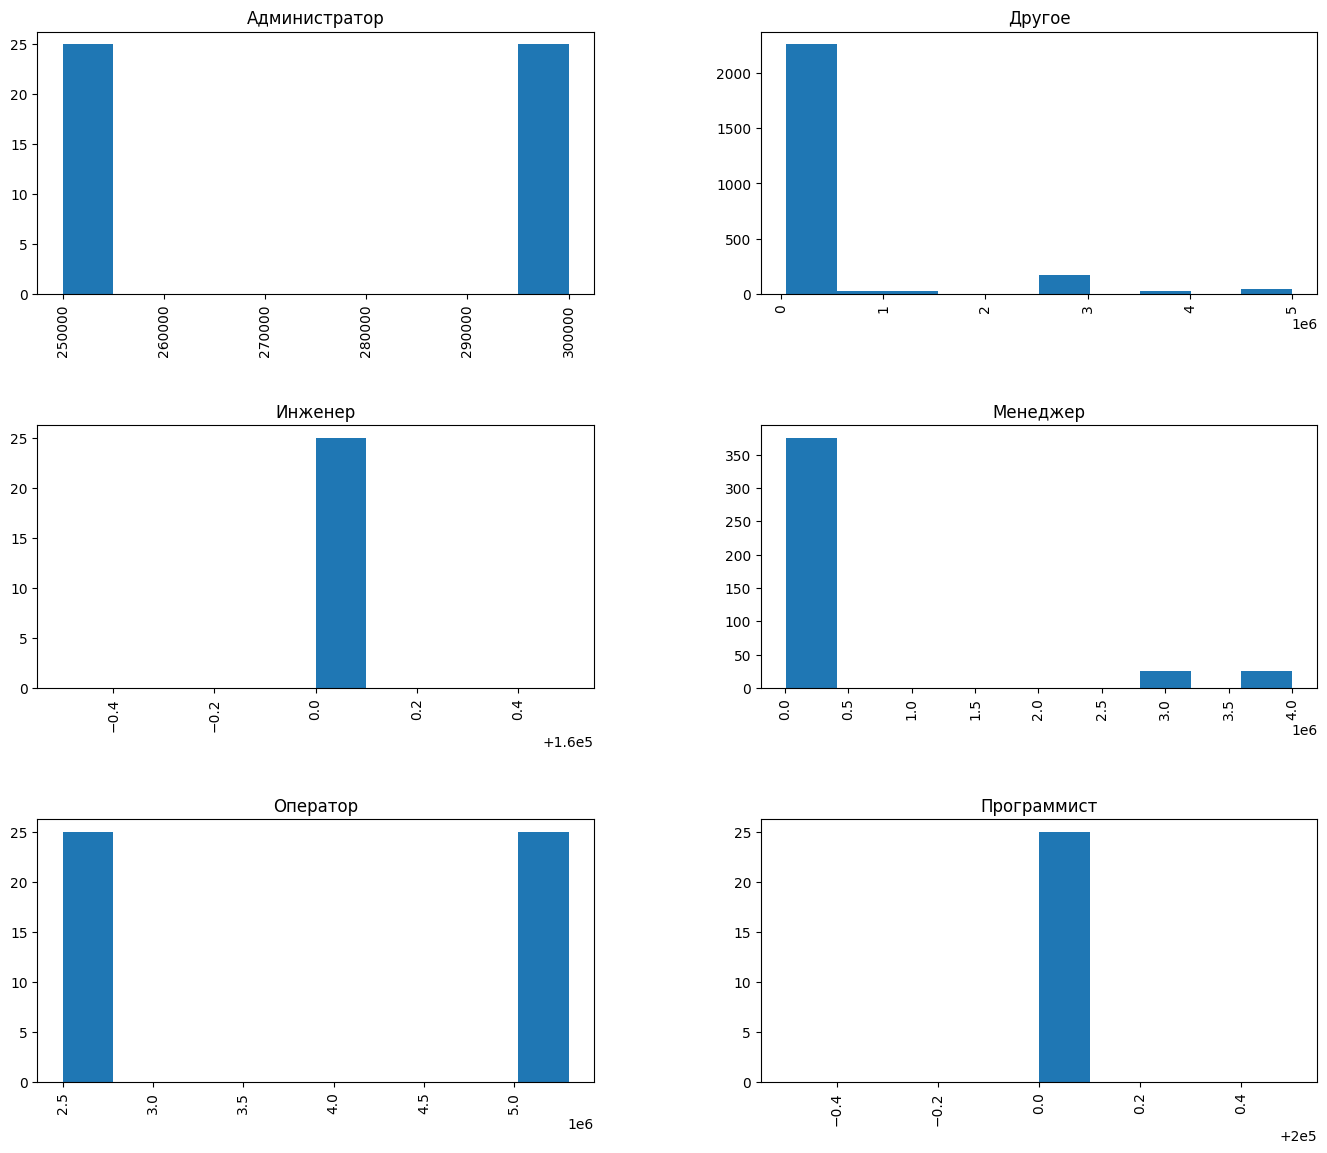

In [24]:
hists = df_201['minSalary'].hist(by=df['category'], figsize=(16, 14), color = "tab:blue", grid = True)
hists

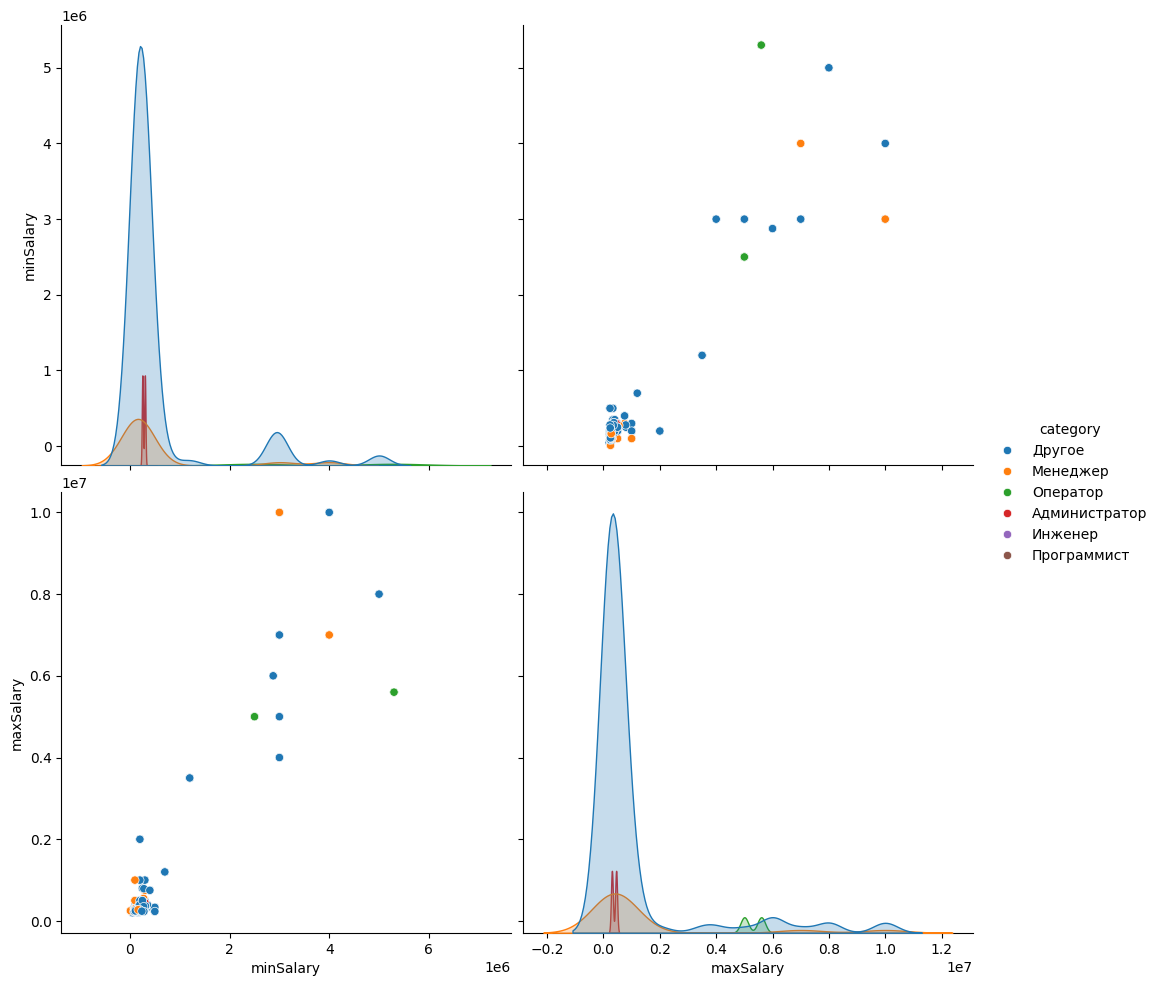

In [27]:
sns.pairplot(vars=["minSalary","maxSalary"], data=df_201, hue="category", height=5)

In [35]:
df_201_ = df[df['maxSalary'] < 500000]
df_201_

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category,days_from_pub
2,Водитель,Ростов-на-Дону,160000.0,200000.0,РСВ,2024-06-23T16:22:39+0300,Полный день,ООО «РСВ» проводит набор водителей категории С...,Обязательный опыт работы на самосвалах. - ⁠зна...,Другое,46.0
3,Помощник юриста,Новосибирск,35000.0,40000.0,Деловые услуги,2024-06-23T07:47:13+0300,Полный день,"подготовка и подача документов, представление ...",высшее юридическое образование. - умение ориен...,Другое,46.0
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...,Менеджер,46.0
5,Тендерный специалист,Новосибирск,70000.0,140000.0,Степашкина Анастасия Викторовна,2024-06-23T10:12:25+0300,Удаленная работа,Занимаемся сопровождением по тендерам других ф...,Отсутствуют,Другое,46.0
6,Фотограф в лагерь,Санкт-Петербург,40000.0,65000.0,Детский лагерь Чайка,2024-06-23T00:01:01+0300,Гибкий график,Фото и видеосъёмка детей в течение дня. — Репо...,"Надёжность, ответственность, пунктуальность, к...",Другое,46.0
...,...,...,...,...,...,...,...,...,...,...,...
47493,Машинист экскаватора-погрузчика САТ 426,Верх-Чебула,100000.0,150000.0,СТК Магистраль,2024-06-23T05:48:14+0300,Вахтовый метод,Отсутствуют,Отсутствуют,Другое,46.0
47494,Газорезчик,Калуга,155000.0,100000.0,Вектор,2024-06-23T09:34:15+0300,Вахтовый метод,Нарезка усилительных пластин ручным держаком.,Опыт работы.,Другое,46.0
47495,"Менеджер по продажам (Автозвук, Аккумуляторы, ...",Владивосток,60000.0,100000.0,Спарта Дв,2024-06-23T10:49:33+0300,Полный день,Консультирование клиентов в торговом зале и по...,Опыт работы в аналогичной сфере НЕ ОБЯЗАТЕЛЕН!...,Менеджер,46.0
47496,Мастер кабельного производства,Балакирево,43500.0,87000.0,ВИМ-Кабель,2024-06-23T11:57:01+0300,Сменный график,Выполнение производственного плана. Организаци...,Образование не ниже среднего профессионального...,Другое,46.0


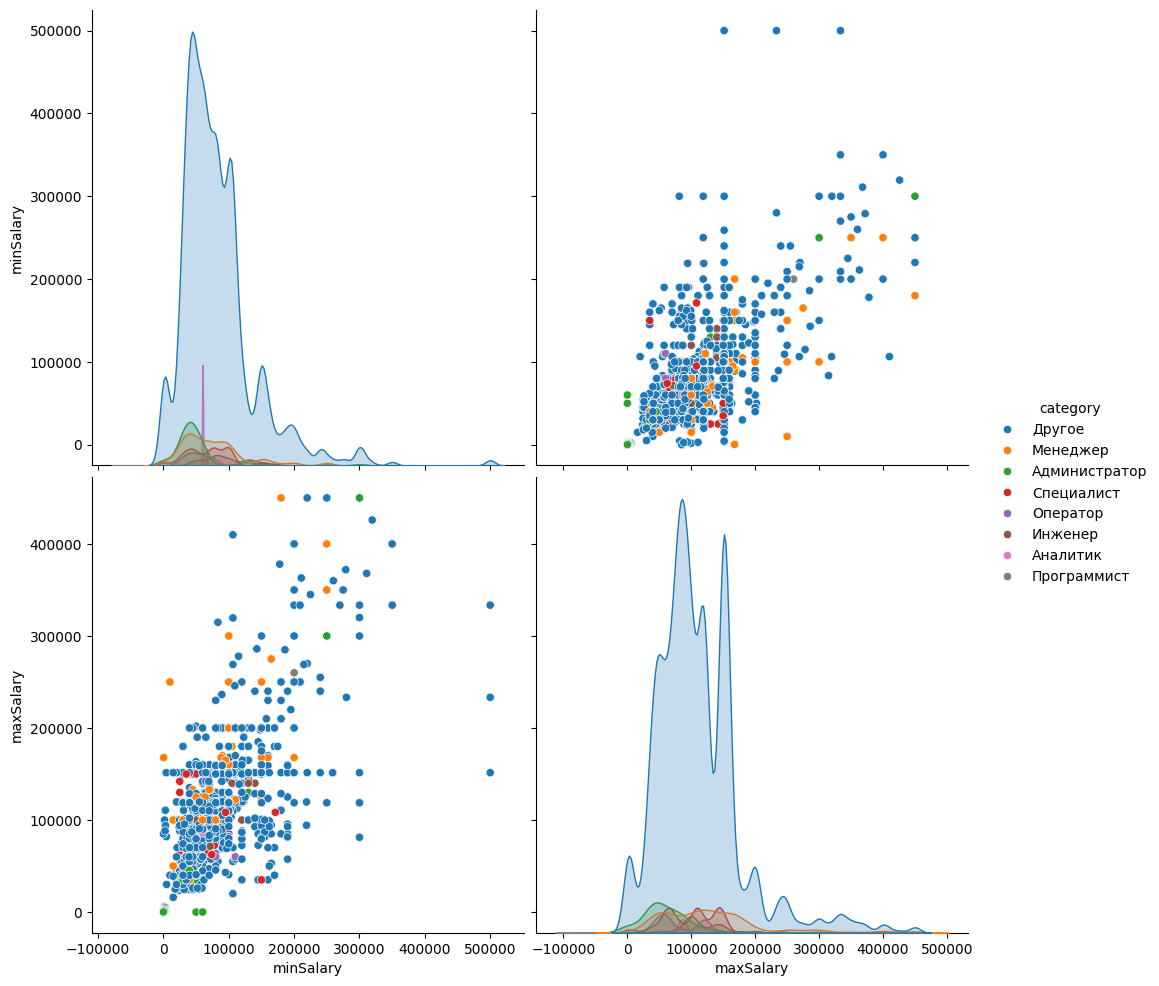

In [36]:
sns.pairplot(vars=["minSalary","maxSalary"], data=df_201_, hue="category", height=5)

In [37]:
df_201__ = df_201_[df_201_['category'] != 'Другое']
df_201__

,name,area,minSalary,maxSalary,employer,published_at,schedule,responsibility,requirement,category,days_from_pub
4,Менеджер маркетплейса Wb,Курск,35000.0,35000.0,Синяев Владимир,2024-06-23T14:51:07+0300,Полный день,Работа с маркетплейсом Wildberries. Сопровожде...,Опыт работы на маркетплейсах от 1 года. Знание...,Менеджер,46.0
10,Администратор салона красоты,Москва,65000.0,120000.0,Студия массажа МNЁМ,2024-06-23T14:46:39+0300,Сменный график,"Функционал: Встреча гостей, консультирование п...",Отсутствуют,Администратор,46.0
21,Администратор,Калининград,40200.0,42000.0,ГБУЗ Психиатрическая больница Калининградской ...,2024-06-23T17:05:40+0300,Полный день,Направление пациентов на прием к врачам. Ответ...,Дисциплинированность. Корректность.,Администратор,46.0
22,Администратор ресепшн гостиницы,Уфа,27000.0,35000.0,Гостиница Уфа-Астория,2024-06-23T12:54:31+0300,Сменный график,Meсто рaбoты: гocтиницa в цeнтpе Уфы. 1. Брони...,1.Наличие навыков работы с компьютером. 2.Грам...,Администратор,46.0
38,Специалист по записи от 4 часов в день,Санкт-Петербург,45000.0,60000.0,МС-КЛИНИКА,2024-06-23T11:00:36+0300,Полный день,"Запись пациентов на прием к врачу ( хирургам,т...",Грамотная устная и письменная речь. Активность...,Специалист,46.0
...,...,...,...,...,...,...,...,...,...,...,...
47463,Администратор фотостудии,Москва,40000.0,45000.0,Replace,2024-06-23T12:46:01+0300,Сменный график,Встреча гостей. -Ответы на звонки. -Отслеживан...,Отсутствуют,Администратор,46.0
47465,Администратор учебного центра,Владивосток,35.0,45.0,Центр транспортной безопасности,2024-06-23T14:14:25+0300,Полный день,Взаимодействие с заказчиками. - Консультирован...,Грамотная устная и письменная речь. Внимательн...,Администратор,46.0
47468,Специалист отдела обучения фармаконадзору,Казань,35000.0,150000.0,Национальный Научный Центр Фармаконадзора,2024-06-23T19:02:15+0300,Полный день,Формирование календарного плана обучения компа...,Высшее/медицинское/ фармацевтическое/ биологич...,Специалист,46.0
47472,Менеджер по закупкам,Екатеринбург,50000.0,125000.0,Ин Пласт Полимер,2024-06-23T13:10:08+0300,Полный день,Компания Ин Пласт Полимер с 2017 года является...,Среднее или высшее образование. Знание сантехн...,Менеджер,46.0


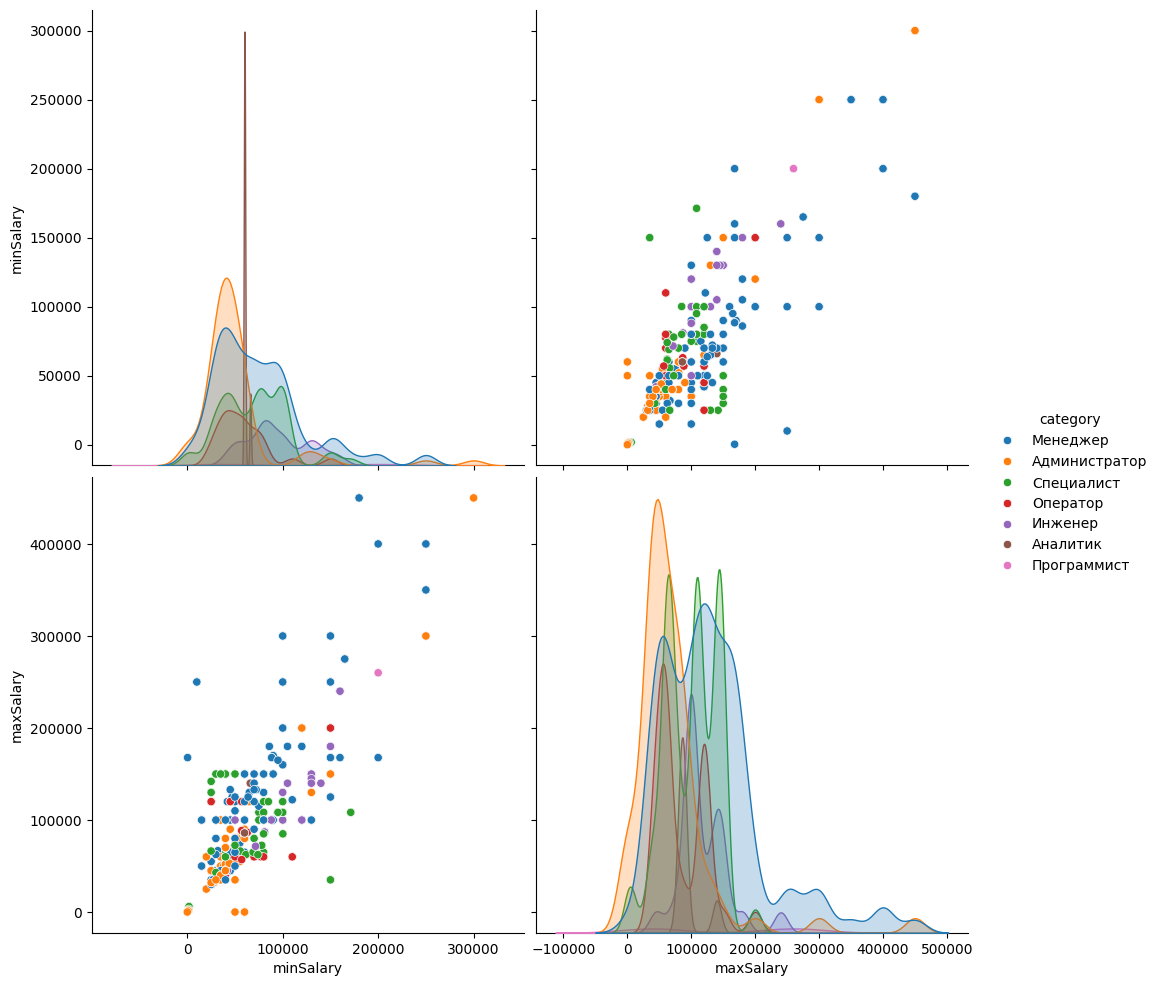

In [38]:
sns.pairplot(vars=["minSalary","maxSalary"], data=df_201__, hue="category", height=5)